# Modelo de Examen Practico - TLP3 - Python para Ciencia de Datos.


**A partir del datasets brindado, realizar los siguientes procedimientos:**

* Importar datasets con Pandas.
* Explorar los datos con los metodos correspondientes. 
* Limpieza de los datos (Normalización de datos).
* Obtener estadisticas.
* Mostrar los datos procesados con graficos utilizando la libreria Matplotlib.
* Exportar el contenido a un archivo sqlite utilizando PANDAS.


**Importante: Se debe documentar cada procedimiento realizado, siguiendo la siguiente estructura:**

1. Celda de Markdown (Documentación)
2. Código (Sin comentarios, se debe documentar lo sufiente solo en la celda de markdown).

## Actividades: 
### 1. Importación del Dataset con Pandas

En esta sección, se debe utilizar la librería Pandas para cargar el archivo CSV que contiene los datos de las calificaciones en un DataFrame, que es la estructura de datos fundamental para el análisis con Pandas.

### 2. Exploración Inicial de los Datos

A continuación, se deben emplear métodos de Pandas para obtener una visión general del dataset. Esto incluye mostrar las primeras filas, obtener un resumen de la información del DataFrame (tipos de datos, valores no nulos), y calcular estadísticas descriptivas de las columnas numéricas.

### 3. Limpieza y Normalización de los Datos

Esta etapa crucial deben aplicar la corrección de diversos errores presentes en el dataset. Se abordarán los valores faltantes, la inconsistencia en el formato de la columna 'Asistencia', los posibles valores atípicos y la normalización de los nombres de estudiantes y materias a un formato consistente (por ejemplo, capitalización).

### 4. Obtención de Estadísticas Descriptivas

Después de la limpieza, deben calcular nuevamente las estadísticas descriptivas para observar el impacto del proceso de limpieza en los datos numéricos. También se pueden calcular estadísticas específicas por grupo (por ejemplo, promedio de calificaciones por materia).

### 5. Visualización de los Datos con Matplotlib

En esta sección, deben utilizar la librería Matplotlib para crear visualizaciones que permitan comprender mejor la distribución de las calificaciones y la asistencia. Se generarán histogramas, diagramas de dispersión y gráficos de barras.

### 6. Exportación a Archivo SQLite

Finalmente, deben utilizar la funcionalidad de Pandas para guardar el DataFrame procesado en una base de datos SQLite. Esto permite almacenar los datos de forma estructurada para su posterior consulta y uso.



## Primera actividad
- Se realizan las importanciones de las librerias correspondientes y se crea el DF

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('datasets_calificaciones.csv')


## Segunda actividad
- Se exploran los datos del DataFrame (tipos de datos, valores no nulos) y se obtiene la estructura general del DataSet.
- Se guarda el DF original en otra variable por cualquier imprevisto.

In [2]:
df_backup=df
print(f"primero \n {df_backup.head(7)}")
print(f"\n segundo \n {df_backup.dtypes}")
print(f"\n tercero \n{df_backup.isnull().sum()}")


primero 
         estudiante            Materia Parcial 1 Parcial 2 Final Asistencia
0        ana pérez        matematicas         8       7.5     9        95%
1     carlos lópez             fisica       6.2         7   NaN        88%
2      maría gómez            quimica         9       8.8   9.5       100%
3  pedro rodríguez           historia       7.5         6     7         75
4     laura vargas        matematicas                 9.2   8.5        92%
5      javier soto             fisica       5.8       6.5     6        80%
6       sofia díaz  ciencias sociales       9.5       9.1              98%

 segundo 
 estudiante    object
Materia       object
Parcial 1     object
Parcial 2     object
Final         object
Asistencia    object
dtype: object

 tercero 
estudiante     0
Materia        0
Parcial 1      5
Parcial 2     10
Final         11
Asistencia     0
dtype: int64


## Terecera actividad
Una vez analizado los datos del dataset se realiza un saneamiento de los mismos, tales como:
- Capitalización de las columnas estudiantes y materias
- Cambiar el tipo de dato de las columnas de parcial 1/2, final y asistencia
- Correción de los datos nulos en las columnas de parcial 1/2 y final

### Normalizar nombres

In [3]:
df_backup["estudiante"]=df_backup["estudiante"].str.title().str.strip()
df_backup["Materia"]=df_backup["Materia"].str.title().str.strip()
df_backup.head()

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,Ana Pérez,Matematicas,8,7.5,9,95%
1,Carlos López,Fisica,6.2,7,NaN,88%
2,María Gómez,Quimica,9,8.8,9.5,100%
3,Pedro Rodríguez,Historia,7.5,6,7,75
4,Laura Vargas,Matematicas,,9.2,8.5,92%


### Limpiar columna de Asistencia

In [4]:
df_backup["Asistencia"]=df_backup["Asistencia"].replace("[%]","",regex=True)
df_backup.head()

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,Ana Pérez,Matematicas,8,7.5,9,95
1,Carlos López,Fisica,6.2,7,NaN,88
2,María Gómez,Quimica,9,8.8,9.5,100
3,Pedro Rodríguez,Historia,7.5,6,7,75
4,Laura Vargas,Matematicas,,9.2,8.5,92


### Transoformación de datos

In [5]:
df_backup["Parcial 1"]=pd.to_numeric(df_backup["Parcial 1"], errors="coerce")
df_backup["Parcial 2"]=pd.to_numeric(df_backup["Parcial 2"], errors="coerce")
df_backup["Final"]=pd.to_numeric(df_backup["Final"], errors="coerce")
df_backup["Asistencia"]=pd.to_numeric(df_backup["Asistencia"], errors="coerce")

df_backup.head(10)

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,Ana Pérez,Matematicas,8.0,7.5,9.0,95
1,Carlos López,Fisica,6.2,7.0,NaN,88
2,María Gómez,Quimica,9.0,8.8,9.5,100
3,Pedro Rodríguez,Historia,7.5,6.0,7.0,75
4,Laura Vargas,Matematicas,NaN,9.2,8.5,92
5,Javier Soto,Fisica,5.8,6.5,6.0,80
6,Sofia Díaz,Ciencias Sociales,9.5,9.1,NaN,98
7,Miguel Fernández,Literatura Universal,8.0,7.8,8.2,85
8,Valentina Ruiz,Matematicas,7.0,NaN,7.8,90
9,Diego Castro,Fisica,6.8,7.2,7.5,93


### Correción de gramática

In [6]:
df_backup["Materia"]=df_backup["Materia"].str.upper().str.strip()
df_backup["Materia"]=df_backup["Materia"].replace({"MATEMATICAS": "Matemáticas", "FISICA":"Física","QUIMICA":"Química", "PROGRAMACION BASICA":"Programación Básica"})
df_backup["Materia"]=df_backup["Materia"].str.title().str.strip()
df.head()

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,Ana Pérez,Matemáticas,8.0,7.5,9.0,95
1,Carlos López,Física,6.2,7.0,NaN,88
2,María Gómez,Química,9.0,8.8,9.5,100
3,Pedro Rodríguez,Historia,7.5,6.0,7.0,75
4,Laura Vargas,Matemáticas,NaN,9.2,8.5,92


### Tratando los datos nulos

In [7]:
df_backup["Parcial 1"] = df_backup["Parcial 1"].fillna(df_backup["Parcial 1"].median())
df_backup["Parcial 2"] = df_backup["Parcial 2"].fillna(df_backup["Parcial 2"].median())
df_backup["Final"] = df_backup["Final"].fillna(df_backup["Final"].median())
df_backup["Asistencia"] = df_backup["Asistencia"].fillna(df_backup["Asistencia"].median())


### Modificando información incoherente en la columna de Asistencia

In [8]:
df_backup["Asistencia"]=df_backup["Asistencia"].replace({101:100, 102:100, 103:100})

In [ ]:
print(df_backup.head())
print(f"\n {df_backup.isnull().sum()}")
print(f"\n {df_backup.head()}")
print(f"\n {df_backup.dtypes}")

## Cuarta Actividad
- En esta parte de la actividad se realizan estadísticas descriptivas, tales como promedio del alumno por materia.

In [ ]:
df_backup["Promedio Estudiante"] = df_backup[["Parcial 1", "Parcial 2", "Final"]].mean(axis=1, skipna=True)
promedio_por_materia = df_backup.groupby("Materia")["Promedio Estudiante"].mean()
print(df_backup.head())


        estudiante      Materia  Parcial 1  Parcial 2  Final  Asistencia  \
0        Ana Pérez  Matemáticas        8.0        7.5    9.0          95   
1     Carlos López       Física        6.2        7.0    7.8          88   
2      María Gómez      Química        9.0        8.8    9.5         100   
3  Pedro Rodríguez     Historia        7.5        6.0    7.0          75   
4     Laura Vargas  Matemáticas        7.9        9.2    8.5          92   

   Promedio Estudiante  
0             8.166667  
1             7.000000  
2             9.100000  
3             6.833333  
4             8.533333  


## Exportación de archivo
Por último, una vez que el saneamiento de datos está finalizado se exporta a un nuevo y limpio archivo en formato csv


In [15]:
df_backup.to_csv("datasets_calificaciones_limpio.csv", index=False)

## Matplotlib
Ahora realizaremos los pasos a seguir para poder crear un gráfico del nuevo dataset creado anteriormente con la librería Matplotlib

## Importación
- Primeramente, importamos la librería con la que vamos a trabajar, en este caso es Matplotlib

In [17]:
import matplotlib.pyplot as plt

## Creación del gráfico
Ahora crearemos el gráfico definiendo cosas como:
- El título
- Los ejex x / y
- Los colores
- Y lo más importante, la información con la que decidiremos trabajar


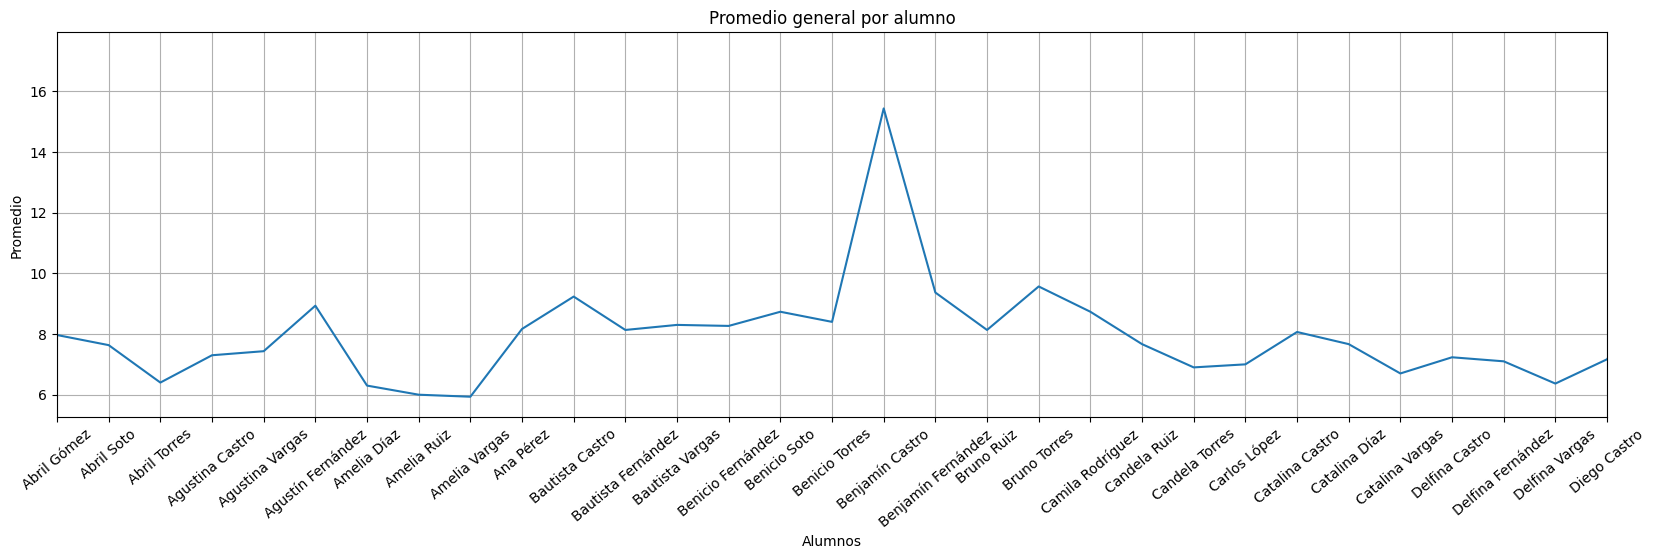

In [ ]:
#Agrupamos los datos con df.grupby
promedio_estudiante = df.groupby('estudiante')['Promedio Estudiante'].sum()

#tamaño de la figura
plt.figure(figsize=(20,5))
#titulo
plt.title("Promedio general por alumno")
#pasamos los valores x, y
plt.plot(promedio_estudiante.index, promedio_estudiante.values)
plt.xlabel("Alumnos")
plt.ylabel("Promedio")
# limitamos la muestra a 30 datos
plt.xlim(0,30)

plt.xticks(rotation=40)
plt.grid()
plt.show()

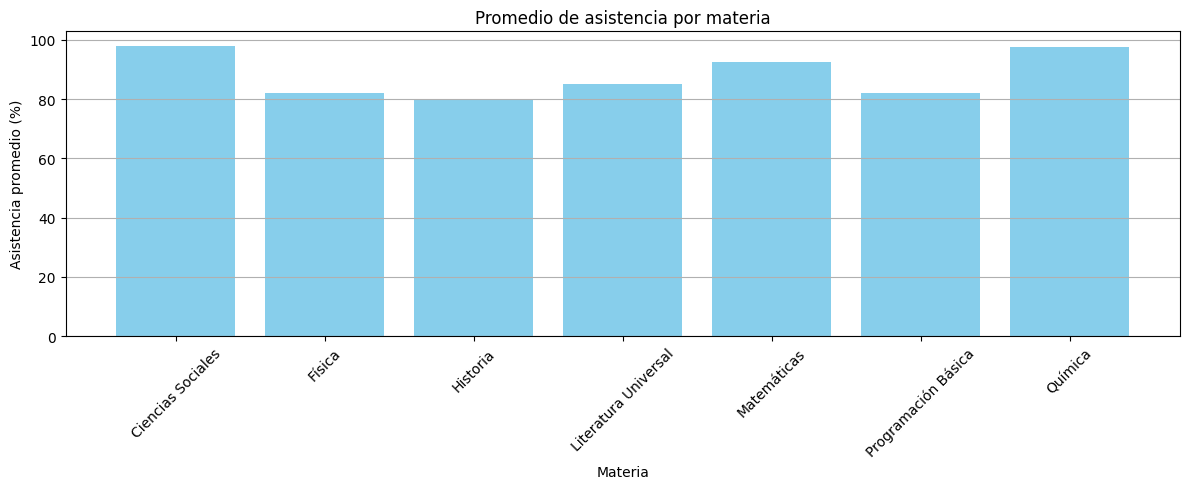

In [ ]:
asistencia_materia = df.groupby("Materia")["Asistencia"].mean()

plt.figure(figsize=(12,5))
plt.title("Promedio de asistencia por materia")
plt.bar(asistencia_materia.index, asistencia_materia.values, color="skyblue")
plt.xlabel("Materia")
plt.ylabel("Asistencia promedio (%)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

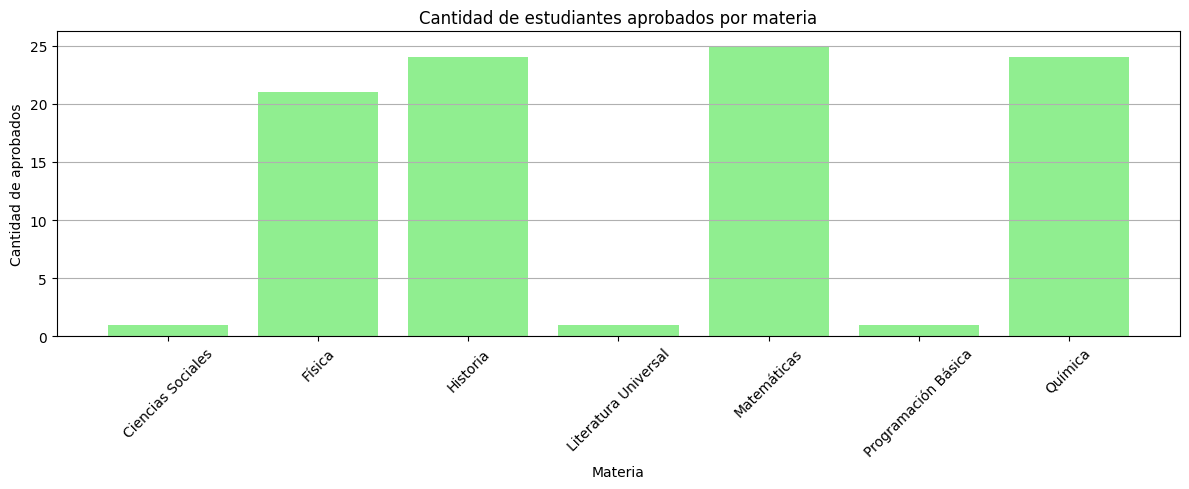

In [34]:
df["Aprobado"] = df["Promedio Estudiante"] >= 6

# Agrupar por materia y contar aprobados
aprobados_por_materia = df.groupby("Materia")["Aprobado"].sum()

# Graficar aprobados por materia
plt.figure(figsize=(12, 5))
plt.title("Cantidad de estudiantes aprobados por materia")
plt.bar(aprobados_por_materia.index, aprobados_por_materia.values, color="lightgreen")
plt.xlabel("Materia")
plt.ylabel("Cantidad de aprobados")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# Exportar DF a un archivo SQLite
Para finalizar con el trabajo, procederé a hacer una exportación del DataFrame a un archivo SQLite para una visualización más legible.

In [35]:
import sqlite3

conn = sqlite3.connect("calificaciones.db")
df.to_sql("calificaciones", conn, if_exists="replace", index=False)
conn.close()